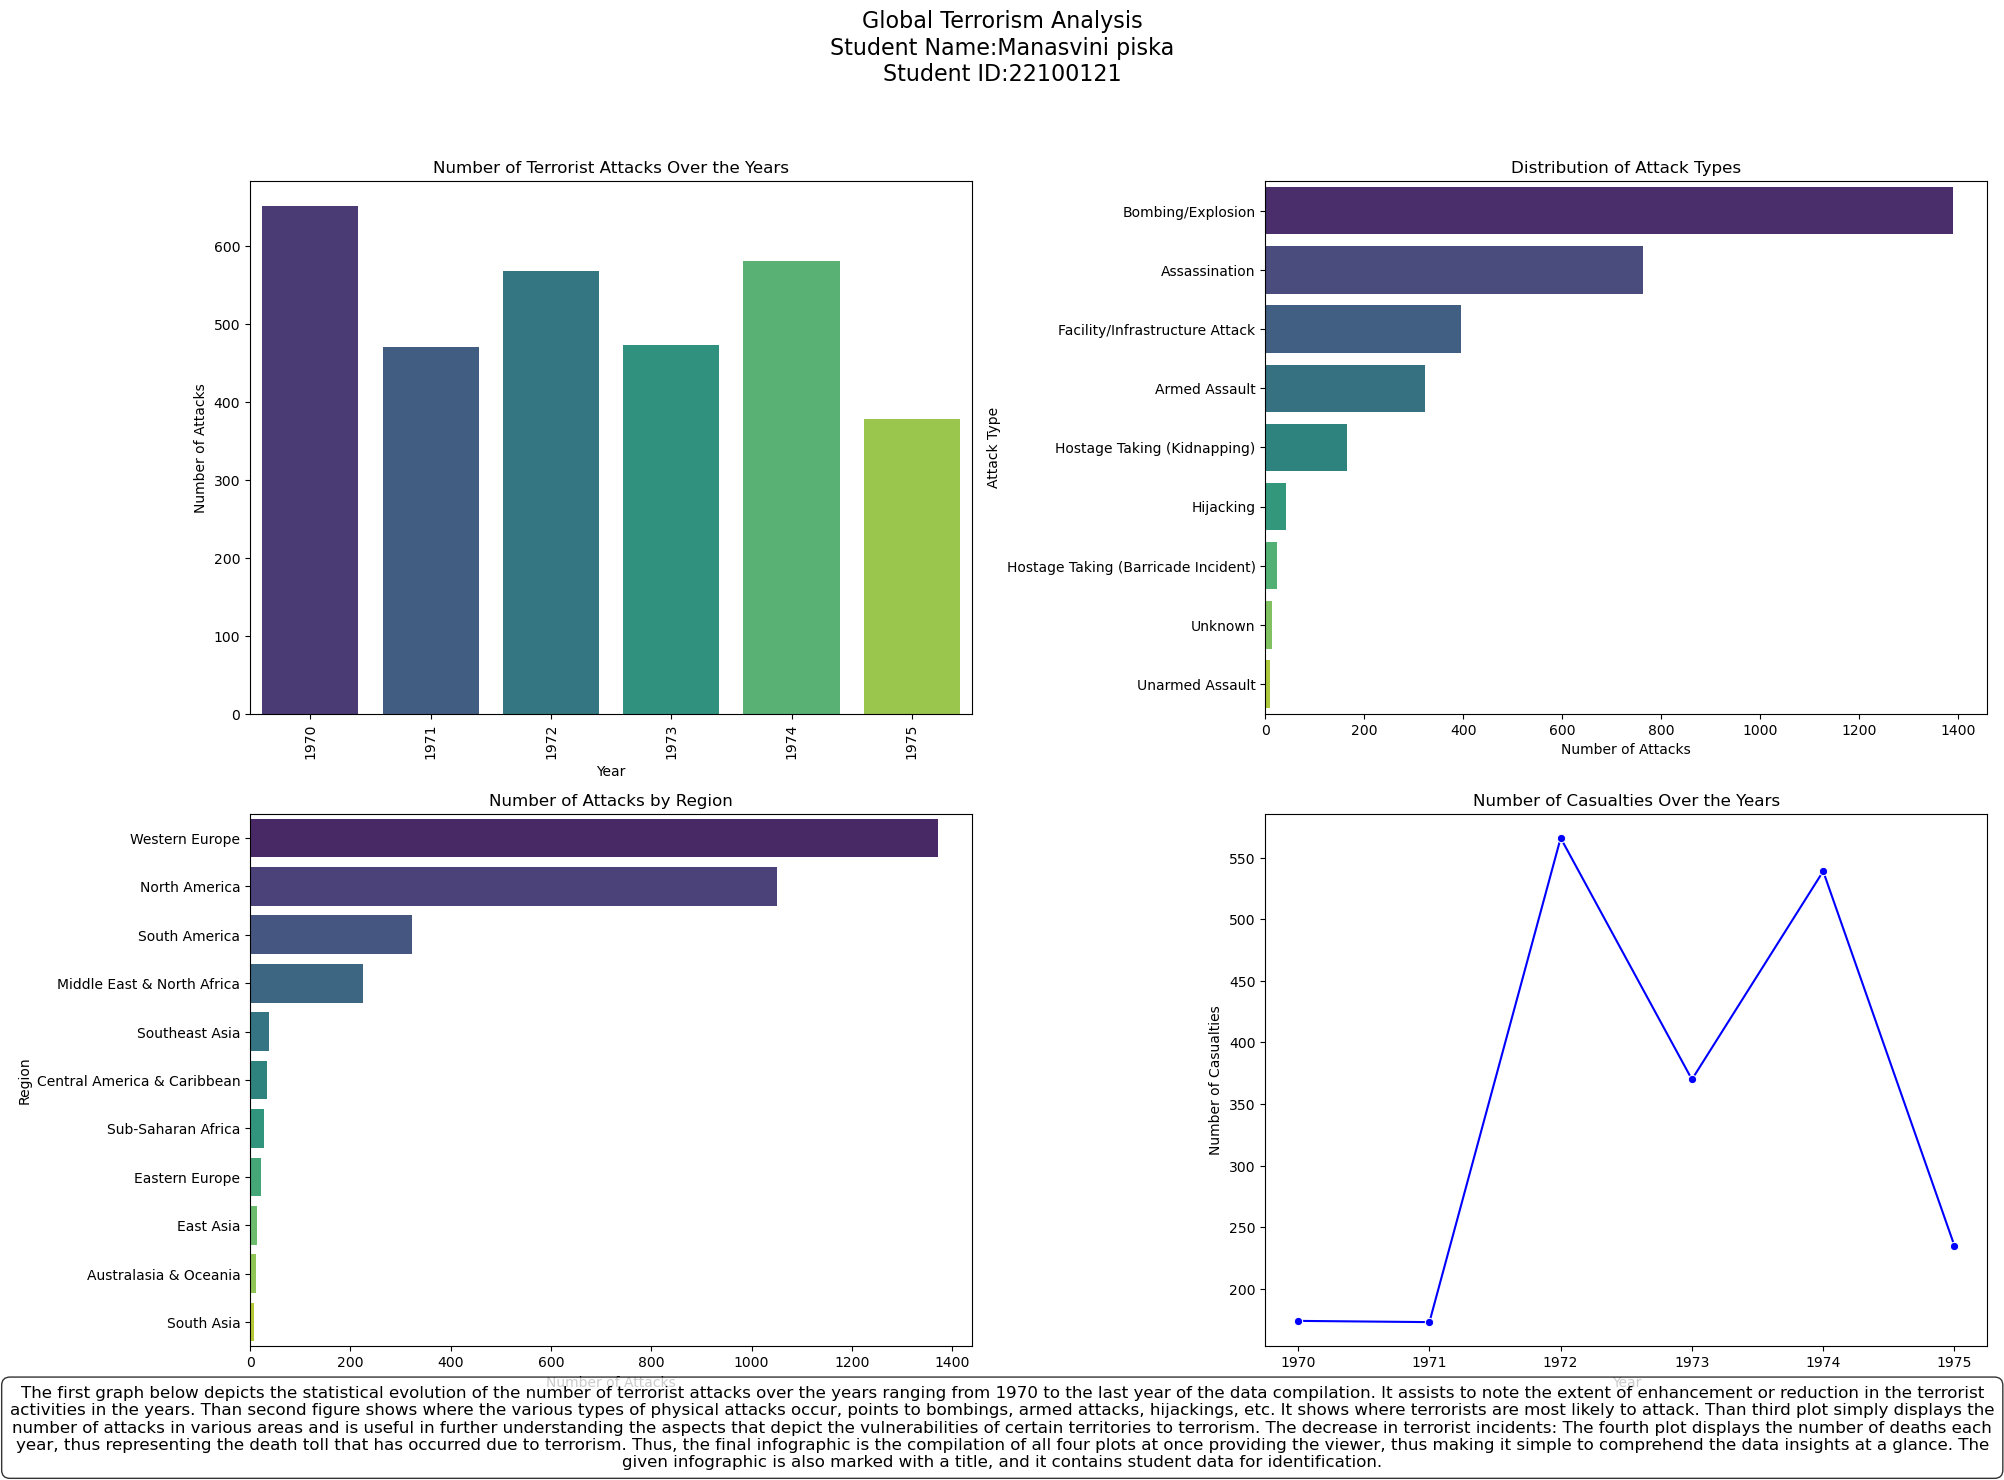

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Try different encoding formats to load the dataset
try:
    df = pd.read_csv('global_terrorism.csv', encoding='utf-8')
except UnicodeDecodeError:
    try:
        df = pd.read_csv('global_terrorism.csv', encoding='latin1')
    except UnicodeDecodeError:
        df = pd.read_csv('global_terrorism.csv', encoding='ISO-8859-1')

# Focus on relevant columns
df = df[['iyear', 'imonth', 'iday', 'region_txt', 'attacktype1_txt', 'nkill', 'nwound']]

# Summary statistics
summary_stats = df.describe()

# Plotting
plt.figure(figsize=(20, 15))

# Plot 1: Number of terrorist attacks over the years
plt.subplot(2, 2, 1)
sns.countplot(x='iyear', data=df, palette='viridis')
plt.title('Number of Terrorist Attacks Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=90)

# Plot 2: Distribution of attack types
plt.subplot(2, 2, 2)
attack_type_counts = df['attacktype1_txt'].value_counts()
sns.barplot(x=attack_type_counts.values, y=attack_type_counts.index, palette='viridis')
plt.title('Distribution of Attack Types')
plt.xlabel('Number of Attacks')
plt.ylabel('Attack Type')

# Plot 3: Number of attacks by region
plt.subplot(2, 2, 3)
region_counts = df['region_txt'].value_counts()
sns.barplot(x=region_counts.values, y=region_counts.index, palette='viridis')
plt.title('Number of Attacks by Region')
plt.xlabel('Number of Attacks')
plt.ylabel('Region')

# Plot 4: Number of casualties over the years
plt.subplot(2, 2, 4)
casualties_per_year = df.groupby('iyear')['nkill'].sum()
sns.lineplot(x=casualties_per_year.index, y=casualties_per_year.values, marker='o', color='b')
plt.title('Number of Casualties Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Casualties')

# Add a main title and student info
plt.suptitle('Global Terrorism Analysis\nStudent Name:Manasvini piska\nStudent ID:22100121', fontsize=16)

# Add a caption below the plots
plt.figtext(0.5, 0.01, "The first graph below depicts the statistical evolution of the number of terrorist attacks over the years ranging from 1970 to the last year of the data compilation. It assists to note the extent of enhancement or reduction in the terrorist activities in the years. Than second figure shows where the various types of physical attacks occur, points to bombings, armed attacks, hijackings, etc. It shows where terrorists are most likely to attack. Than third plot simply displays the number of attacks in various areas and is useful in further understanding the aspects that depict the vulnerabilities of certain territories to terrorism. The decrease in terrorist incidents: The fourth plot displays the number of deaths each year, thus representing the death toll that has occurred due to terrorism. Thus, the final infographic is the compilation of all four plots at once providing the viewer, thus making it simple to comprehend the data insights at a glance. The given infographic is also marked with a title, and it contains student data for identification.",
             wrap=True, horizontalalignment='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'))

# Save the infographic
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.savefig("22100121.png", dpi=300)

# Save summary statistics to a CSV file
summary_stats.to_csv('summary_statistics.csv')

plt.show()
